In [57]:
import numpy as np, pandas as pd, seaborn as sns

# Pivot Tables

In this section we will be using the All-time Classic Titanic Dataset, available on the Seaborn Libary.

This contains a wealth of information on each passenger of that ill-fated voyage, including gender, age, class, fare paid, and much more.

In [58]:
Titanic=sns.load_dataset('titanic')
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Pivot Tables by Hand

Let's start by grouping the data according to Gender. From the section covered previously you might be tempted to apply the `GroupBy` function 

In [59]:
# for i in Titanic.groupby('sex'):
#     print(i[1])
Titanic.groupby('sex').describe()

survived                                              pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0  577.0  2.389948   

        ... parch        fare                                               \
        ...   75%  max  count       mean        std   min        25%   50%   
sex     ...                                                                  
female  ...   1.0  6.0  314.0  44.479818  57.997698  6.75  12.071875  23.0   
male    ...   0.0  5.0  577.0  25.523893  43.138263  0.00   7.895800  10.5   

                         
          75%       max  
sex                      
female  55.00  512.3292  
male    26.55  512.3292  

[2 rows x 48 columns]

Say we want to go deeper into our analysis and study the survival by sex and class. We can do so as follows

In [60]:
Titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

C:\Users\denis\AppData\Local\Temp\ipykernel_10556\2247836722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Although this gives us a complete idea of both the tasks, the code can be declutered. Pivot Tables can solve this problem for us

## Pivot Table Syntax

The same previous code could be rewritten as follows to make things more readable

In [61]:
Titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


As expected, the women and higher classes had more chances of survival. i.e. First class woman survived without any uncertainity whereas third class men had the least chances of making it out

### Multi-level Pivot Tables

Just like groupby, the grouping in pivot tables can be specified with multiple levels. For example, we can look at age and a third dimension

**Note**
the use of the pandas `cut` method

In [62]:
age=pd.cut(Titanic['age'],[0,18,80],labels=['Teen','Adult'])
Titanic.pivot_table('survived',index=['sex',age],columns='class')

class            First    Second     Third
sex    age                                
female Teen   0.909091  1.000000  0.511628
       Adult  0.972973  0.900000  0.423729
male   Teen   0.800000  0.600000  0.215686
       Adult  0.375000  0.071429  0.133663

We can apply the same strategy when working with the columns as well; let's add info on the fare paid using `pd.qcut` to automatically compute quantiles:



In [63]:
fareBreakdown=pd.qcut(Titanic['fare'],q=2,labels=['Lower','Upper'])
Titanic.pivot_table('survived',index=['sex',age],columns=[fareBreakdown,'class'])

fare         Lower                         Upper                    
class        First    Second     Third     First    Second     Third
sex    age                                                          
female Teen    NaN  1.000000  0.714286  0.909091  1.000000  0.318182
       Adult   NaN  0.880000  0.444444  0.972973  0.914286  0.391304
male   Teen    NaN  0.000000  0.260870  0.800000  0.818182  0.178571
       Adult   0.0  0.098039  0.125000  0.391304  0.030303  0.192308

### Additional Pivot Table Options

The full implementation of this function goes as follows
```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(
    data, 
    values=None, 
    index=None, 
    columns=None,
    aggfunc='mean', 
    fill_value=None, 
    margins=False,
    dropna=True, 
    margins_name='All'
)
```

We've already seen the examples of active usage of the first 3(4) arguments. Let's see the rest here

The `aggfunc` keyword controls what type of aggregation is applied, which is mean by default. The values can vary from common aggregation function strings (`'sum'`,`'mean'`,`'count'`,`'min'`,`'max'`) to proper functions (`np.sum()`,`min()`,`max()`,`sum()`)

Multiple aggregate functions can also be specified in the form of a dictionary that maps a **column to function**

In [64]:
Titanic.pivot_table(index='sex',columns='class',aggfunc={'survived':'sum','fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice how we've completely ignored the `values` argument. We're specifying the coloumns that the aggregate functions need to be applied on alongside the functions itself

In [65]:
Titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Examples

Let's study the freely available data on births in the United States, provided by the Centers for Disease Control (CDC)

In [66]:
Births=pd.read_csv('births.csv')
Births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


Say we want to see the how gender plays a role in births over the span of decades

In [67]:
Births['Decade']=10*(Births['year']//10)
Births.pivot_table('births',index='Decade',columns='gender',aggfunc='sum')

gender,F,M
Decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


It's clear how male births outnumber Female births. Now let's plot this using some functions

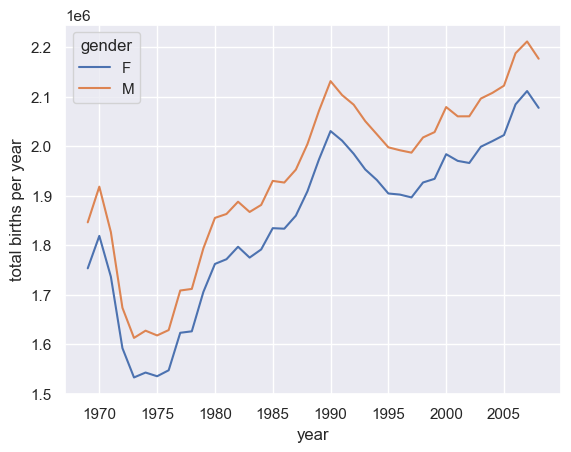

In [68]:
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
Births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');


## Further Data Exploration

Although this doesn't quite relate to pivot tables, there are some more analysis that can be done on this dataset using pandas tools covered up until.

Let's start by cleaning up the data a bit, removing outliers caused by mistyped dates or missiong values. 

One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation

In [69]:
Births

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [70]:
quartiles=np.percentile(Births['births'],[25,50,75])
mu=quartiles[1] #median
sig=0.74*(quartiles[2]-quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution

In [71]:
Births = Births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
Births

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [72]:
Births['day']=Births['day'].astype(int)

C:\Users\denis\AppData\Local\Temp\ipykernel_10556\1087321219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Births['day']=Births['day'].astype(int)


In [73]:
Births.index=pd.to_datetime(10000*Births['year']+100*Births['month']+Births['day'],format='%Y%m%d')

Using this we can plot births by weekday for several decades:

In [74]:
Births['dayofweek']=Births.index.dayofweek

C:\Users\denis\AppData\Local\Temp\ipykernel_10556\2848303749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Births['dayofweek']=Births.index.dayofweek


In [75]:
Births

,year,month,day,gender,births,Decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


Now we can plot this data to study the Births per weekday across several decades

C:\Users\denis\AppData\Local\Temp\ipykernel_10556\2309749270.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([0,'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


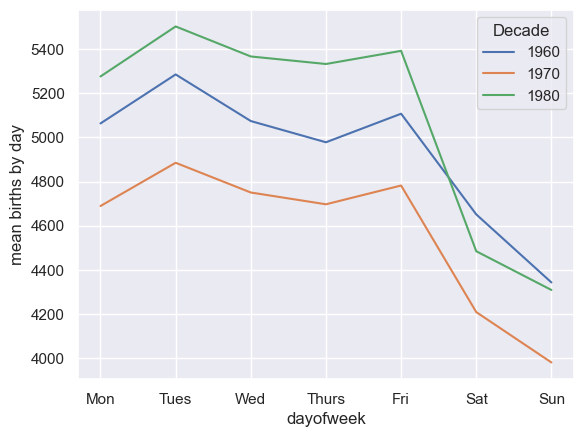

In [77]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Births.pivot_table('births', index='dayofweek',
                    columns='Decade', aggfunc='mean').plot()
plt.gca().set_xticklabels([0,'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
